In [1]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from prophet import Prophet

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.shape

(92016, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
df.FullDate = pd.to_datetime(df.FullDate,dayfirst=True)
df.FullDate

0       2010-09-01 00:00:00
1       2010-09-01 01:00:00
2       2010-09-01 02:00:00
3       2010-09-01 03:00:00
4       2010-09-01 04:00:00
                ...        
92011   2021-02-28 19:00:00
92012   2021-02-28 20:00:00
92013   2021-02-28 21:00:00
92014   2021-02-28 22:00:00
92015   2021-02-28 23:00:00
Name: FullDate, Length: 92016, dtype: datetime64[ns]

In [8]:
df.set_index('FullDate',drop=True,inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


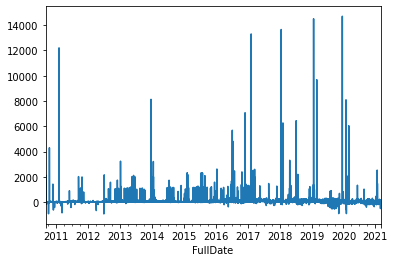

In [9]:
#this plot looks messy so let's resample
df.ElecPrice.plot()

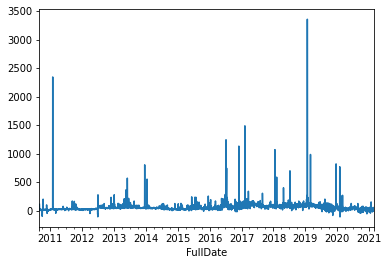

In [10]:
#to get a better visualization of what I want to predict i resampled daily
df_daily = df.resample('D').mean()

#this still looks messy, let's resample further
df_daily.ElecPrice.plot()

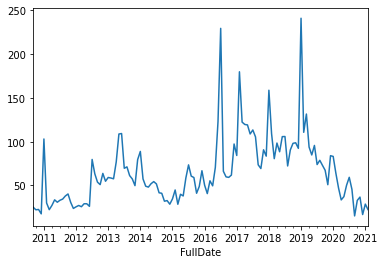

In [11]:
#lets resample by a month
df_month = df.resample('M').mean()

df_month.ElecPrice.plot()
#this looks better 

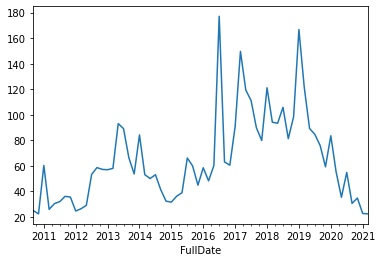

In [12]:
#lets resample by 2months
df_month2 = df.resample('2M').mean()

df_month2.ElecPrice.plot()

In [13]:
#let's test for stationarity using Adfuller
sts.adfuller(df.ElecPrice)

#since p-value is less than 0.05 and the ADF statistic is less than the critical values obtained, we can say that the ElecPrice is stationary

(-31.952975699557843,
 0.0,
 53,
 91962,
 {'1%': -3.430421110703783,
  '5%': -2.8615714297867108,
  '10%': -2.56678672898094},
 1196013.0270263082)

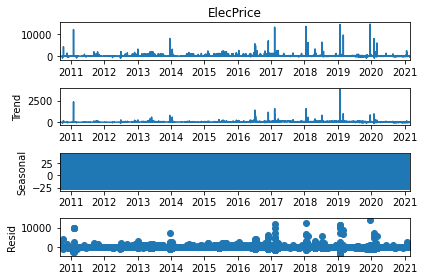

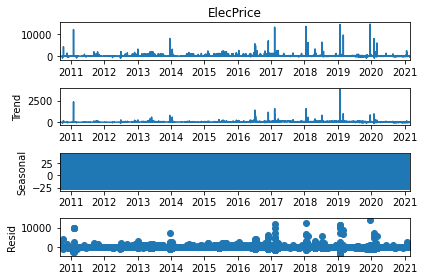

In [14]:
seasonality = seasonal_decompose(df.ElecPrice,model='additive')

seasonality.plot()

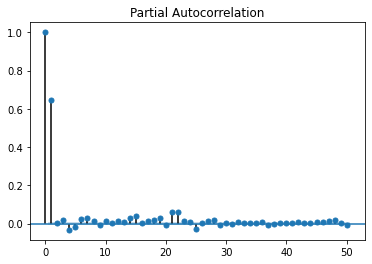

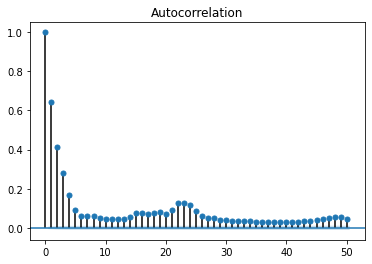

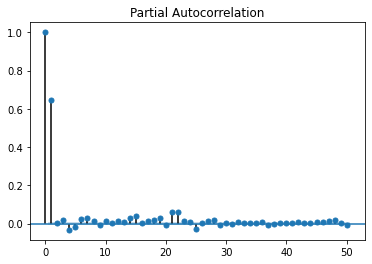

In [15]:
#from the plot above we can see that there is no seasonality in the ElecPrice

sgt.plot_acf(df.ElecPrice)

sgt.plot_pacf(df.ElecPrice)

In [16]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


In [17]:
sts.adfuller(df_daily.SysLoad)

(-3.6901589888366413,
 0.0042537255045741835,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 54930.737615237456)

In [18]:
sts.adfuller(df_daily.GasPrice)

(-2.902766697165181,
 0.045027212884625294,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 8685.261996278323)

In [19]:
sts.adfuller(df_daily.ElecPrice)

(-8.269053866873804,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 44958.0861741366)

In [20]:
df_daily = df_daily.reset_index()
df_daily

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,15.8,1731.890833,3.6900,114.654167
1,2010-09-02,15.4,1620.791250,3.6900,23.783750
2,2010-09-03,18.3,1736.073333,4.4500,21.040625
3,2010-09-04,13.7,1484.920208,3.3900,20.928125
4,2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...,...
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167


In [21]:
df_pred = df_daily.drop(columns=['Tmax','SysLoad','GasPrice'])

In [22]:
df_pred.rename({'FullDate':'ds','ElecPrice':'y'},axis=1,inplace=True)

In [23]:
df_pred

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458
...,...,...
3829,2021-02-24,26.448750
3830,2021-02-25,24.063125
3831,2021-02-26,60.228958
3832,2021-02-27,20.374167


In [24]:
df_train = df_pred[:2757]

In [25]:
df_test = df_pred[2757:]

In [26]:
#Univariate Analysis
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bey4lj1/jsa6j9yg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bey4lj1/7q_oium1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44439', 'data', 'file=/tmp/tmp1bey4lj1/jsa6j9yg.json', 'init=/tmp/tmp1bey4lj1/7q_oium1.json', 'output', 'file=/tmp/tmpzns0_bgu/prophet_model-20221004135748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
forecast = model.predict(df_test)

In [28]:
forecast_ = forecast[['ds','yhat']]

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [30]:
mean_absolute_percentage_error(df_test.y,forecast_.yhat)

5.409655021659422

In [31]:
np.sqrt(mean_squared_error(df_test.y,forecast_.yhat))

133.35689831692912

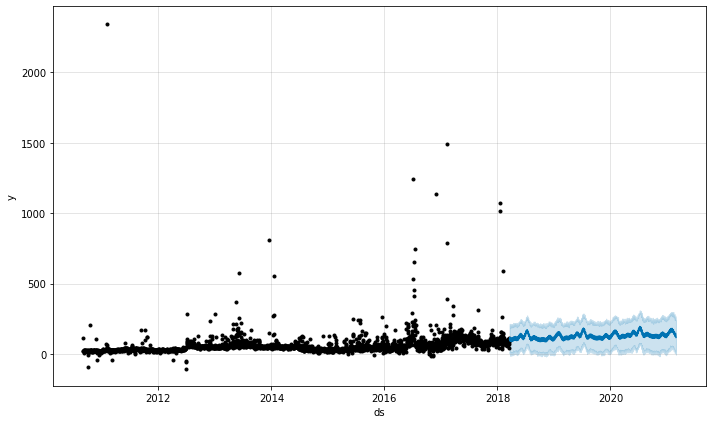

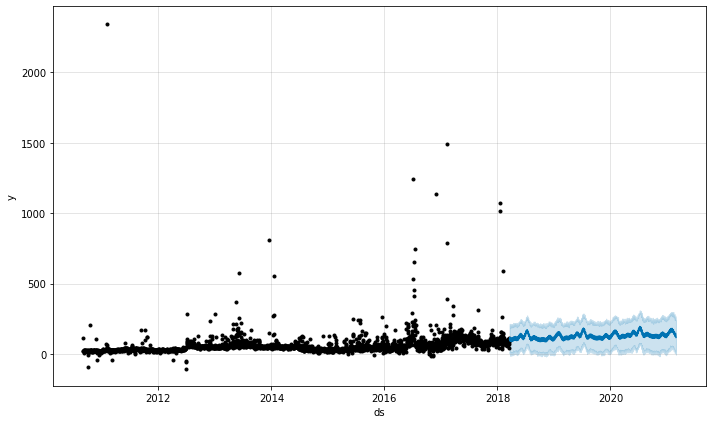

In [32]:
model.plot(forecast)

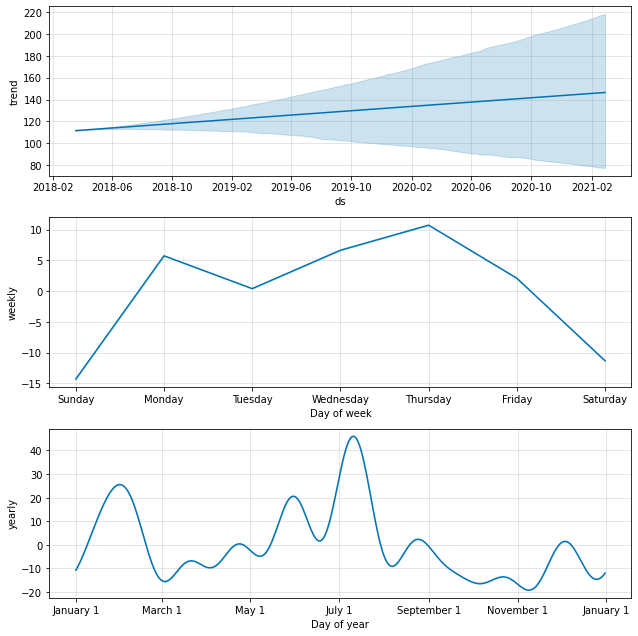

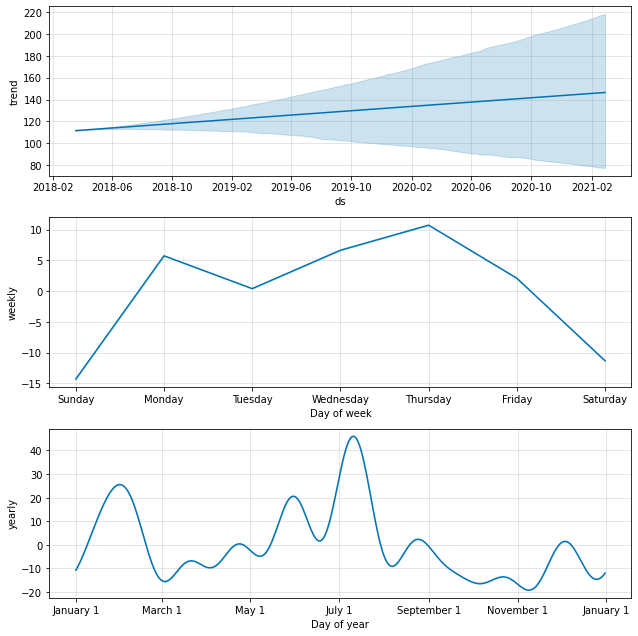

In [33]:
model.plot_components(forecast)

In [34]:
df_pred['add1'] = df_daily['SysLoad']
df_pred['add2'] = df_daily['Tmax']
df_pred['add3'] = df_daily['GasPrice']
df_pred.head()

,ds,y,add1,add2,add3
0,2010-09-01,114.654167,1731.890833,15.8,3.69
1,2010-09-02,23.783750,1620.791250,15.4,3.69
2,2010-09-03,21.040625,1736.073333,18.3,4.45
3,2010-09-04,20.928125,1484.920208,13.7,3.39
4,2010-09-05,20.856458,1483.808750,14.9,4.45


In [35]:
df_train = df_pred[:2757]
df_test = df_pred[2757:]


In [36]:
#Multivariate Analysis
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bey4lj1/btpfecvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bey4lj1/lxcyh0f2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=620', 'data', 'file=/tmp/tmp1bey4lj1/btpfecvn.json', 'init=/tmp/tmp1bey4lj1/lxcyh0f2.json', 'output', 'file=/tmp/tmpl1vos2q3/prophet_model-20221004135755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
forecast= model.predict(df_test)

In [38]:

mean_absolute_percentage_error(df_test.y,forecast.yhat)

2.3739686062148118

In [39]:
np.sqrt(mean_squared_error(df_test.y,forecast.yhat))

113.0670774173661

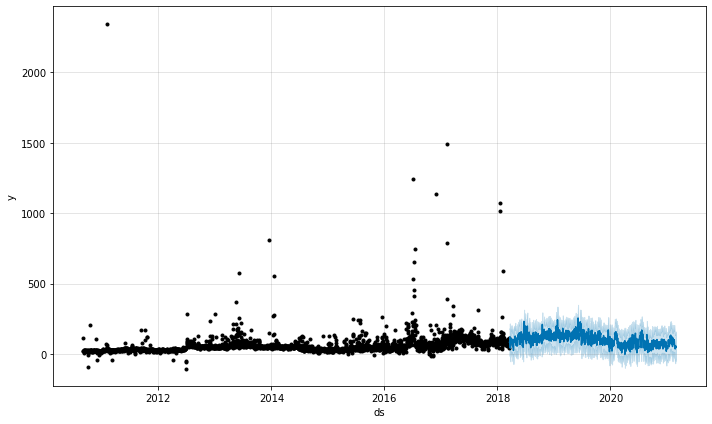

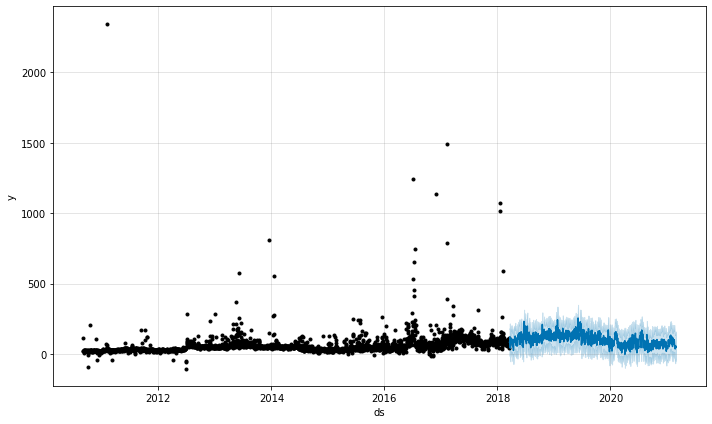

In [40]:
model.plot(forecast)

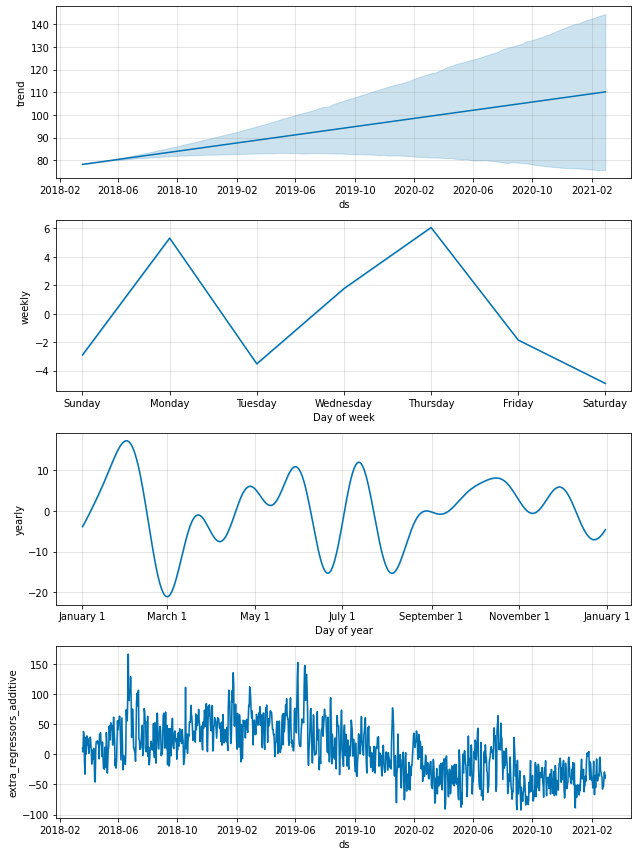

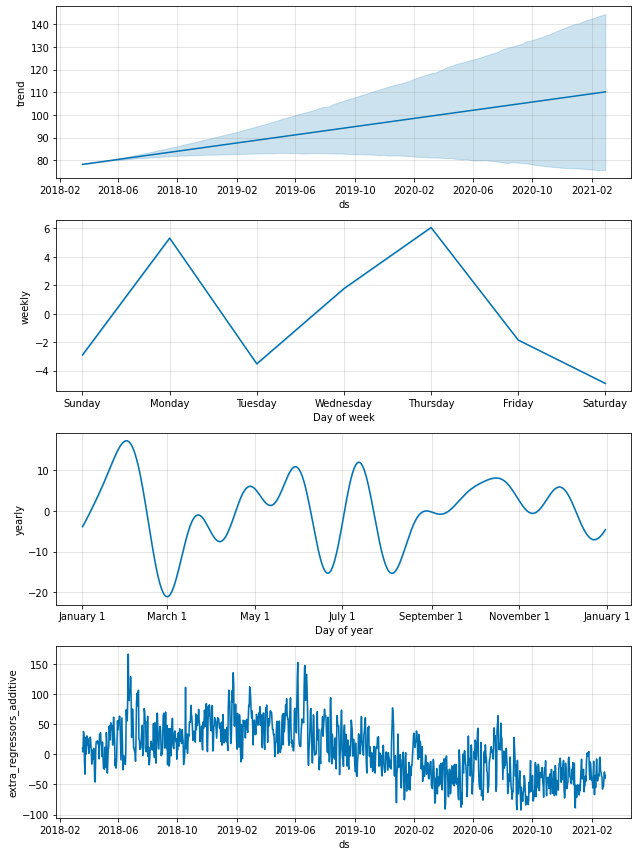

In [41]:
model.plot_components(forecast)

In [42]:
#since add2 == Tmax we drop it
df_pred.drop('add2',axis=1,inplace=True)
df_train = df_pred[:2757]
df_test = df_pred[2757:]



In [43]:
#Multivariate Analysis without Tmax
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add3')
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bey4lj1/dnhjbuhi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bey4lj1/qrrlac51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92747', 'data', 'file=/tmp/tmp1bey4lj1/dnhjbuhi.json', 'init=/tmp/tmp1bey4lj1/qrrlac51.json', 'output', 'file=/tmp/tmptt1fpm1x/prophet_model-20221004135802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
forecast = model.predict(df_test)

In [45]:
mean_absolute_percentage_error(df_test.y,forecast.yhat)

2.32319952980623

# Thank you Hamoye
It was a worthwhile learning experience